# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import seaborn as sns
import warnings
import random
import re
warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv('brazilian_championship.csv')
df_original.head(2)

,YEAR,ROUND,day_month,team_wiki_HOME,team_name_HOME,team_nick_HOME,team_state_HOME,result,team_wiki_VISITOR,team_name_VISITOR,team_nick_VISITOR,team_state_VISITOR,stadium_name,stadium_nick,stadium_city,hour,goals_home_time,goals_visitor_time,audience,income
0,2015,Vigésima rodada,22 de agosto,/wiki/Santos_Futebol_Clube,Santos Futebol Clube,Santos,São Paulo,5 – 2,/wiki/Ava%C3%AD_Futebol_Clube,Avaí Futebol Clube,Avaí,Santa Catarina,Estádio Urbano Caldeira,Estádio Vila Belmiro,Santos,18:30,"['10', '12', '47', '80', '90+2\xa0(pen)']","['28', '82']",12036,R$ 289.880.00
1,2015,Vigésima rodada,22 de agosto,/wiki/Goi%C3%A1s_Esporte_Clube,Goiás Esporte Clube,Goiás,Goiás,3 – 0,/wiki/Club_de_Regatas_Vasco_da_Gama,Club de Regatas Vasco da Gama,Vasco da Gama,Rio de Janeiro,Estádio Serra Dourada,Estádio Serra Dourada,Goiânia,18:30,"['4', '16\xa0(pen)', '76\xa0(pen)']",[],11177,R$ 267.895.00


### Selecting columns and splitting the result into two columns

In [3]:
df = df_original[["ROUND","YEAR", "team_nick_HOME", "team_nick_VISITOR", "result", "audience", "income"]]
new = df["result"].str.split("–", expand=True)
df["home_goals"] = [int(i.strip()) if str.isalnum(i.strip()) else -1 for i in new[0]]
df["visitor_goals"] = [int(i.strip()) if str.isalnum(i.strip()) else -1 for i in new[1]]
df.drop(["result"], axis=1, inplace=True)
df.sort_values(by="YEAR").head()

,ROUND,YEAR,team_nick_HOME,team_nick_VISITOR,audience,income,home_goals,visitor_goals
4119,Rodada 32,2008,Figueirense,Fluminense,NaN,NaN,0,1
3318,Rodada 15,2008,Atlético Paranaense,Figueirense,17528,NaN,0,0
3319,Rodada 15,2008,São Paulo,Portuguesa,12276,NaN,3,1
3320,Rodada 15,2008,Atlético Mineiro,Vitória,7099,NaN,2,1
3321,Rodada 15,2008,Flamengo,Botafogo,35915,NaN,0,0


### Transform the ordinal values in the ROUND column into cardinal numbers

In [4]:
df["ROUND"] = df["ROUND"].str.lower().str.replace("rodada", "").str.strip()

# ordinal values
uni = ["","primeira", "segunda", "terceira", "quarta", "quinta",
       "sexta", "sétima", "oitava", "nona"]

dec = ["", "décima", "vigésima", "trigésima"] 

#associate ordinal values with cardinal values 
vals = []
count = 0

for d in dec:
    for u in uni:    
        vals.append([f"{d} {u}".strip(), count])
        count += 1

vals.pop(0)
print("vals: \n", vals)

# replace values in the dataframe
for v in vals:
    df.loc[df["ROUND"] == v[0], "ROUND"] = v[1]
    
# show the results
df.sort_values(by="YEAR").head()


vals: 
 [['primeira', 1], ['segunda', 2], ['terceira', 3], ['quarta', 4], ['quinta', 5], ['sexta', 6], ['sétima', 7], ['oitava', 8], ['nona', 9], ['décima', 10], ['décima primeira', 11], ['décima segunda', 12], ['décima terceira', 13], ['décima quarta', 14], ['décima quinta', 15], ['décima sexta', 16], ['décima sétima', 17], ['décima oitava', 18], ['décima nona', 19], ['vigésima', 20], ['vigésima primeira', 21], ['vigésima segunda', 22], ['vigésima terceira', 23], ['vigésima quarta', 24], ['vigésima quinta', 25], ['vigésima sexta', 26], ['vigésima sétima', 27], ['vigésima oitava', 28], ['vigésima nona', 29], ['trigésima', 30], ['trigésima primeira', 31], ['trigésima segunda', 32], ['trigésima terceira', 33], ['trigésima quarta', 34], ['trigésima quinta', 35], ['trigésima sexta', 36], ['trigésima sétima', 37], ['trigésima oitava', 38], ['trigésima nona', 39]]


,ROUND,YEAR,team_nick_HOME,team_nick_VISITOR,audience,income,home_goals,visitor_goals
4119,32,2008,Figueirense,Fluminense,NaN,NaN,0,1
3318,15,2008,Atlético Paranaense,Figueirense,17528,NaN,0,0
3319,15,2008,São Paulo,Portuguesa,12276,NaN,3,1
3320,15,2008,Atlético Mineiro,Vitória,7099,NaN,2,1
3321,15,2008,Flamengo,Botafogo,35915,NaN,0,0


In [5]:
new_values_audience = df['audience'].str.extract('(\d+)').dropna().astype(int)
ids_new_values_audience = new_values_audience.index
df_audience = df.iloc[ids_new_values_audience]
df_audience["audience"] = new_values_audience

In [6]:
# configure the plot
sns.set(font_scale = 1.2, style="white")

### Top 10 audiences

In [7]:
top10_audiences = df_audience.sort_index(by="audience", ascending=False).head(10)
values_top10 = top10_audiences[["team_nick_HOME", "team_nick_VISITOR"]].values.tolist()
values_top10_str = [" X ".join(i) for i in values_top10]

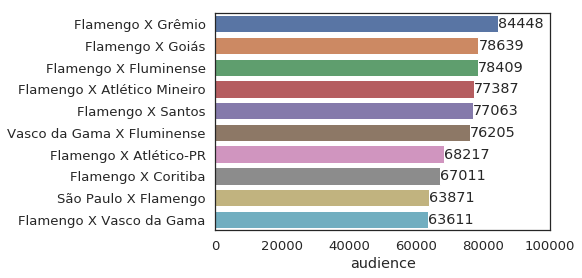

In [8]:
sns.barplot(x=top10_audiences["audience"], y=values_top10_str)
plt.xlim(0, 100000)
for x, y in zip(top10_audiences["audience"], range(len(values_top10_str))):
    plt.text(x + 0.2, y, x, ha='left', va='center')


### Top 10 incomes

In [9]:
# remove not nulls
df_income_notnull = df[pd.notnull(df["income"])]

In [10]:
def income_to_float(x):
    *begin, end= x.replace("R$","").strip().split(".")
    join = f"{''.join(begin)}.{end}"
    to_string = re.sub('[^\d\.]', '', join)
    return float(to_string)

In [11]:
# convert "income" column into float
df_income_notnull["income"] =  df_income_notnull["income"].apply(income_to_float)
# removing outlier 
df_income_notnull.drop(axis=0, index=1125, inplace=True)
top10_income = df_income_notnull.sort_index(by="income", ascending=False).head(10)
values_top10_income = top10_income[["team_nick_HOME", "team_nick_VISITOR"]].values.tolist()
values_top10_income_str = [" X ".join(i) for i in values_top10_income]

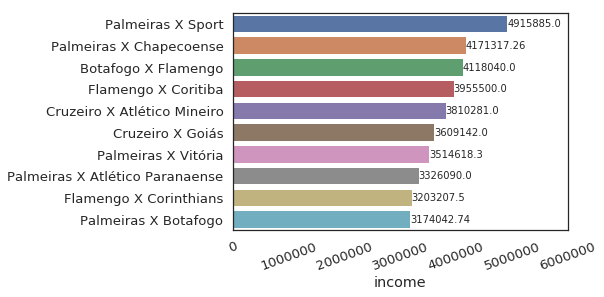

In [12]:
sns.barplot(x=top10_income["income"], y=values_top10_income_str)
plt.xlim(0, 6000000)
locs, labels = plt.xticks()
plt.setp(labels, rotation=20)
for x, y in zip(top10_income["income"], range(len(values_top10_income_str))):
    plt.text(x + 0.2, y, x, ha='left', va='center', fontsize=10)


###  Top 10 wins

In [13]:
df_top_wins = df.loc[(df.home_goals - df.visitor_goals).abs().sort_values(ascending=False).index].head(10)
df_top_wins = df_top_wins.iloc[::-1]

In [14]:
values_top10_win = top10_income[["team_nick_HOME", "team_nick_VISITOR"]].values.tolist()
values_top10_win_str = [" X ".join(i) for i in values_top10_income]

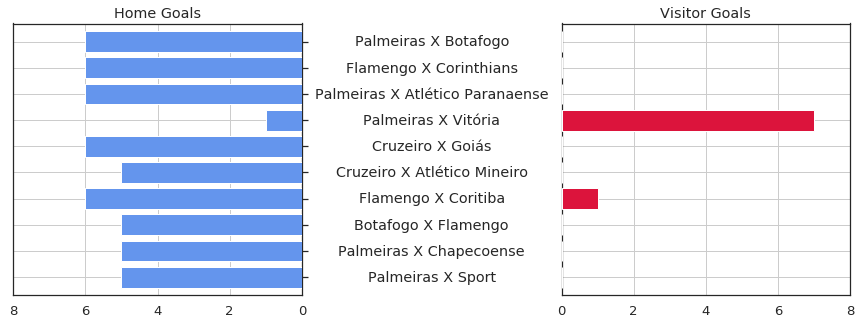

In [15]:
y = np.arange(10)

fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
axes[0].barh(y, df_top_wins["home_goals"], align='center', color='cornflowerblue', zorder=10)
axes[0].set(title='Home Goals')
axes[1].barh(y, df_top_wins["visitor_goals"], align='center', color='crimson', zorder=10)
axes[1].set(title='Visitor Goals')
axes[1].set_xlim(0,8)

axes[0].invert_xaxis()
#axes[0].set(yticks=y, yticklabels=values_top10_win_str)

axes[0].set(yticks=y, yticklabels=[])
for yloc, match in zip(y, values_top10_win_str):
    axes[0].annotate(match, (0.5, yloc), xycoords=('figure fraction', 'data'), ha='center', va='center')

axes[0].yaxis.tick_right()
axes[0].set_xlim(8)
    
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.subplots_adjust(wspace=.9)
plt.show()


### Teams with more participations

In [102]:
# filter columns
df_more_part = df[["YEAR", "team_nick_HOME", "team_nick_VISITOR"]]

# deal with different names to the same team
df_more_part.loc[df_more_part["team_nick_HOME"] == "Atlético Paranaense", "team_nick_HOME"] = 'Atlético-PR'
df_more_part.loc[df_more_part["team_nick_HOME"] == "Atlético Mineiro", "team_nick_HOME"] = 'Atlético-MG'
df_more_part.loc[df_more_part["team_nick_VISITOR"] == "Atlético Paranaense", "team_nick_VISITOR"] = 'Atlético-PR'
df_more_part.loc[df_more_part["team_nick_VISITOR"] == "Atlético Mineiro", "team_nick_VISITOR"] = 'Atlético-MG'

# select all the different teams 
all_teams = sorted(set(chain.from_iterable([i.tolist() for i in 
                                            df_more_part[["team_nick_HOME", 
                                                          "team_nick_VISITOR"]].values])))

In [118]:
def team_exists_in_year(team, year):
    return any(df_more_part[(
                              (df_more_part["team_nick_HOME"] == team) | 
                              (df_more_part["team_nick_VISITOR"] == team)
                            ) 
                            & 
                           (df_more_part["YEAR"] == year)])

In [113]:
years = df_more_part["YEAR"].sort_values().unique()

In [128]:
teams_year = np.array([[team,year] for team in all_teams
                                   for year in years if team_exists_in_year(team, year)])

In [170]:
team_x_year = dict()
default_years = list([0] * len(years))

for t in all_teams:
    yearts_one_team = teams_year[np.squeeze(teams_year[:,:1] == t)][:,1:]
    for i, y in enumerate(years):
        if str(y) in yearts_one_team:
            default_years[i] = 1
        
    team_x_year[t] = default_years[:]
    default_years = list([0] * len(years))
            
#teams_year[np.squeeze(teams_year[:,:1]) == all_teams[0]

In [172]:
for t in all_teams:
    yearts_one_team = teams_year[np.squeeze(teams_year[:,:1] == all_teams[0] )][:,1:]
    print(t, len(yearts_one_team))

América Mineiro 11
Atlético Goianiense 11
Atlético-MG 11
Atlético-PR 11
Avaí 11
Bahia 11
Barueri 11
Botafogo 11
Ceará 11
Chapecoense 11
Corinthians 11
Coritiba 11
Criciúma 11
Cruzeiro 11
Figueirense 11
Flamengo 11
Fluminense 11
Goiás 11
Grêmio 11
Grêmio Barueri 11
Grêmio Prudente 11
Guarani 11
Internacional 11
Ipatinga 11
Joinville 11
Náutico 11
Palmeiras 11
Paraná 11
Ponte Preta 11
Portuguesa 11
Santa Cruz 11
Santo André 11
Santos 11
Sport 11
São Paulo 11
Vasco da Gama 11
Vitória 11


## Under construction....